In [1]:
import os
os.chdir("/Users/alessandro/Projects/PythonProjects/Repos/prosperity-algo-trading")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stat
import math
import typing
import jsonpickle as jp
import statsmodels.api as sm

In [5]:
df = pd.read_csv("data/prices_round_1_day_0.csv", header=0, sep = ';')
df.columns = df.columns.str.strip('"')
df = df.map(lambda x: x.strip('"') if isinstance(x, str) else x)
df.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0
7,0,300,AMETHYSTS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,0.0
8,0,400,AMETHYSTS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,0.0
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0


In [6]:
df_amethysts = df[df['product'] == 'AMETHYSTS']
df_amethysts.reset_index(drop=True, inplace=True)
df_amethysts

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
2,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
3,0,300,AMETHYSTS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,0.0
4,0,400,AMETHYSTS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
9996,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
9997,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
9998,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [7]:
df_starfruit = df[df['product'] == 'STARFRUIT']
df_starfruit.reset_index(drop=True, inplace=True)
df_starfruit

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
1,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
2,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0
3,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0
4,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
9996,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
9997,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
9998,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


# Plots

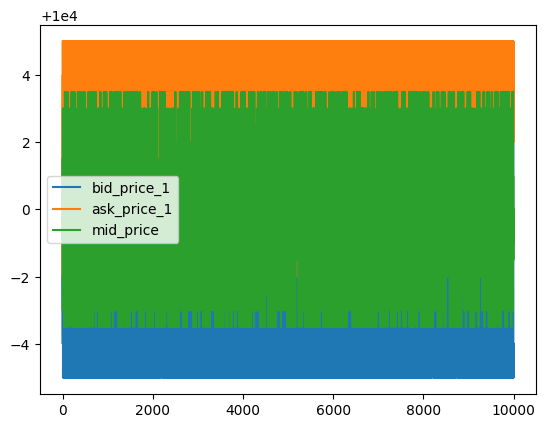

In [11]:
df_amethysts['bid_price_1'].plot()
df_amethysts['ask_price_1'].plot()
df_amethysts['mid_price'].plot()

plt.legend()

In [12]:
for i in range(1,11):
    sma = df_starfruit['mid_price'].rolling(window=i).mean()
    sma = sma.shift(1)
    mse = np.mean((sma - df_starfruit['mid_price'])**2)
    print("Mean squared error SMA","(", i, ")", ":", mse)

sma = df_starfruit['mid_price'].rolling(window=5).mean()

Mean squared error SMA ( 1 ) : 2.821057105710571
Mean squared error SMA ( 2 ) : 2.196401780356071
Mean squared error SMA ( 3 ) : 2.0419514743311886
Mean squared error SMA ( 4 ) : 1.9798012955182074
Mean squared error SMA ( 5 ) : 1.9716718359179533
Mean squared error SMA ( 6 ) : 1.9772683054277045
Mean squared error SMA ( 7 ) : 1.9983850940556493
Mean squared error SMA ( 8 ) : 2.040693492293835
Mean squared error SMA ( 9 ) : 2.0778731722748
Mean squared error SMA ( 10 ) : 2.1236799299299394


In [14]:
df_starfruit['mid_price'].head(10)

0    5039.5
1    5042.0
2    5040.0
3    5040.5
4    5039.5
5    5040.5
6    5040.5
7    5040.0
8    5039.5
9    5039.5
Name: mid_price, dtype: float64

In [15]:


for i in range(1,20):
    
    # Define the window size
    window = i

    # Create a separate DataFrame for lagged features
    lagged_df = pd.DataFrame()
    for i in range(1, window+1):
        lagged_df[f'lag_{i}'] = df_starfruit['mid_price'].shift(i)

    # Drop rows with NaN resulting from the lagged features
    lagged_df.dropna(inplace=True)

    # Define the target variable
    y = df_starfruit['mid_price'].iloc[window:]

    # Define the features (lagged prices)
    X = lagged_df[[f'lag_{i}' for i in range(1, window+1)]]

    # Add constant to the features
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    predictions = model.predict(X)

    mse = np.mean((predictions - df_starfruit['mid_price'])**2)
    print("Mean squared error LR","(", i, ")", ":", mse)


Mean squared error LR ( 1 ) : 2.806245882326177
Mean squared error LR ( 2 ) : 2.1898118481270017
Mean squared error LR ( 3 ) : 2.0276220291550917
Mean squared error LR ( 4 ) : 1.9529757503351586
Mean squared error LR ( 5 ) : 1.924093669772386
Mean squared error LR ( 6 ) : 1.9062169974972343
Mean squared error LR ( 7 ) : 1.8984605151674194
Mean squared error LR ( 8 ) : 1.8980271606979695
Mean squared error LR ( 9 ) : 1.8956086887341272
Mean squared error LR ( 10 ) : 1.8954800512998824
Mean squared error LR ( 11 ) : 1.8943851053922018
Mean squared error LR ( 12 ) : 1.8944746287941823
Mean squared error LR ( 13 ) : 1.894507634594643
Mean squared error LR ( 14 ) : 1.8932778774323202
Mean squared error LR ( 15 ) : 1.8934226023549803
Mean squared error LR ( 16 ) : 1.892789943196366
Mean squared error LR ( 17 ) : 1.8928409399066586
Mean squared error LR ( 18 ) : 1.8925166125501682
Mean squared error LR ( 19 ) : 1.8919450583370585


In [16]:
# Define the window size
window = 6

# Create a separate DataFrame for lagged features
lagged_df = pd.DataFrame()
for i in range(1, window+1):
    lagged_df[f'lag_{i}'] = df_starfruit['mid_price'].shift(i)

# Drop rows with NaN resulting from the lagged features
lagged_df.dropna(inplace=True)

# Define the target variable
y = df_starfruit['mid_price'].iloc[window:]

# Define the features (lagged prices)
X = lagged_df[[f'lag_{i}' for i in range(1, window+1)]]

# Add constant to the features
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

LR = model.predict(X)


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mid_price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.181e+05
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:33:48   Log-Likelihood:                -17405.
No. Observations:                9994   AIC:                         3.482e+04
Df Residuals:                    9987   BIC:                         3.487e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3333      5.993      2.392      0.017       2.585      26.081
lag_1          0.3109      0.010     31.215      0.000       0.291       0.330
lag_2          0.2243      0.010     21.573      0.000       0.204       0.245
lag_3          0.1479      0.011     14.004      0.000       0.127       0.169
lag_4          0.1267      0.011     11.996      0.000       0.106       0.147
lag_5          0.0905      0.010      8.706      0.000       0.070       0.111
lag_6          0.0969      0.010      9.728      0.000       0.077       0.116
==============================================================================
Omnibus:                      159.876   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.520
Skew:                           0.052   Prob(JB):                     1.67e-67
Kurtosis:                       3.853   Cond. No.                     5.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
LR_coefficients = model.params

const    14.333341
lag_1     0.310888
lag_2     0.224272
lag_3     0.147905
lag_4     0.126696
lag_5     0.090512
lag_6     0.096894
dtype: float64

<Axes: >

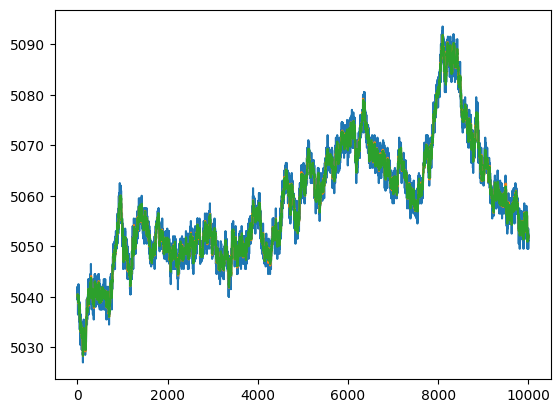

In [18]:
#df_starfruit['bid_price_1'].plot()
#df_starfruit['ask_price_1'].plot()
df_starfruit['mid_price'].plot()
sma.plot()
LR.plot()

#plt.xlim([100,200])


# Let's see if the same model works good also in day -1 and -2

In [21]:
df_1 = pd.read_csv("data/prices_round_1_day_-1.csv", header=0, sep = ';')

df_starfruit_1 = df_1[df_1['product'] == 'STARFRUIT']
df_starfruit_1.reset_index(drop=True, inplace=True)
df_starfruit_1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
1,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
2,-1,200,STARFRUIT,5041,2,5040.0,20.0,NaN,NaN,5047,20,NaN,NaN,NaN,NaN,5044.0,0.0
3,-1,300,STARFRUIT,5040,31,NaN,NaN,NaN,NaN,5046,2,5047.0,29.0,NaN,NaN,5043.0,0.0
4,-1,400,STARFRUIT,5039,27,NaN,NaN,NaN,NaN,5046,27,NaN,NaN,NaN,NaN,5042.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1,999500,STARFRUIT,5041,2,5040.0,5.0,5037.0,31.0,5042,8,5044.0,31.0,NaN,NaN,5041.5,0.0
9996,-1,999600,STARFRUIT,5040,5,5037.0,30.0,NaN,NaN,5044,30,NaN,NaN,NaN,NaN,5042.0,0.0
9997,-1,999700,STARFRUIT,5037,26,NaN,NaN,NaN,NaN,5044,26,NaN,NaN,NaN,NaN,5040.5,0.0
9998,-1,999800,STARFRUIT,5036,20,NaN,NaN,NaN,NaN,5043,20,NaN,NaN,NaN,NaN,5039.5,0.0


<Axes: >

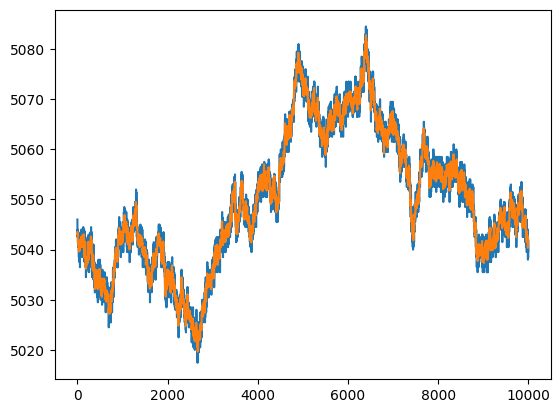

In [31]:
# for each row in the df_starfruit_1 dataframe, we want to predict the mid_price using the LR model having coefficients LR_coefficients

# Define the window size
window = 6

# Create a separate DataFrame for lagged features
lagged_df_1 = pd.DataFrame()
for i in range(1, window+1):
    lagged_df_1[f'lag_{i}'] = df_starfruit_1['mid_price'].shift(i)

# Drop rows with NaN resulting from the lagged features
lagged_df_1.dropna(inplace=True)

# Define the features (lagged prices)
X = lagged_df_1[[f'lag_{i}' for i in range(1, window+1)]]

# Add constant to the features
X = sm.add_constant(X)

# Predict the mid_price
predictions = np.dot(X, LR_coefficients)

df_starfruit_1['mid_price'].plot()
pd.Series(predictions).plot()
